In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [135]:
df = pd.read_csv('winequality-red.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'winequality-red.csv'

In [103]:
df = pd.read_csv('winequality-red.csv', na_values = ['id'])

In [104]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


ValueError: Could not interpret input 'quality'

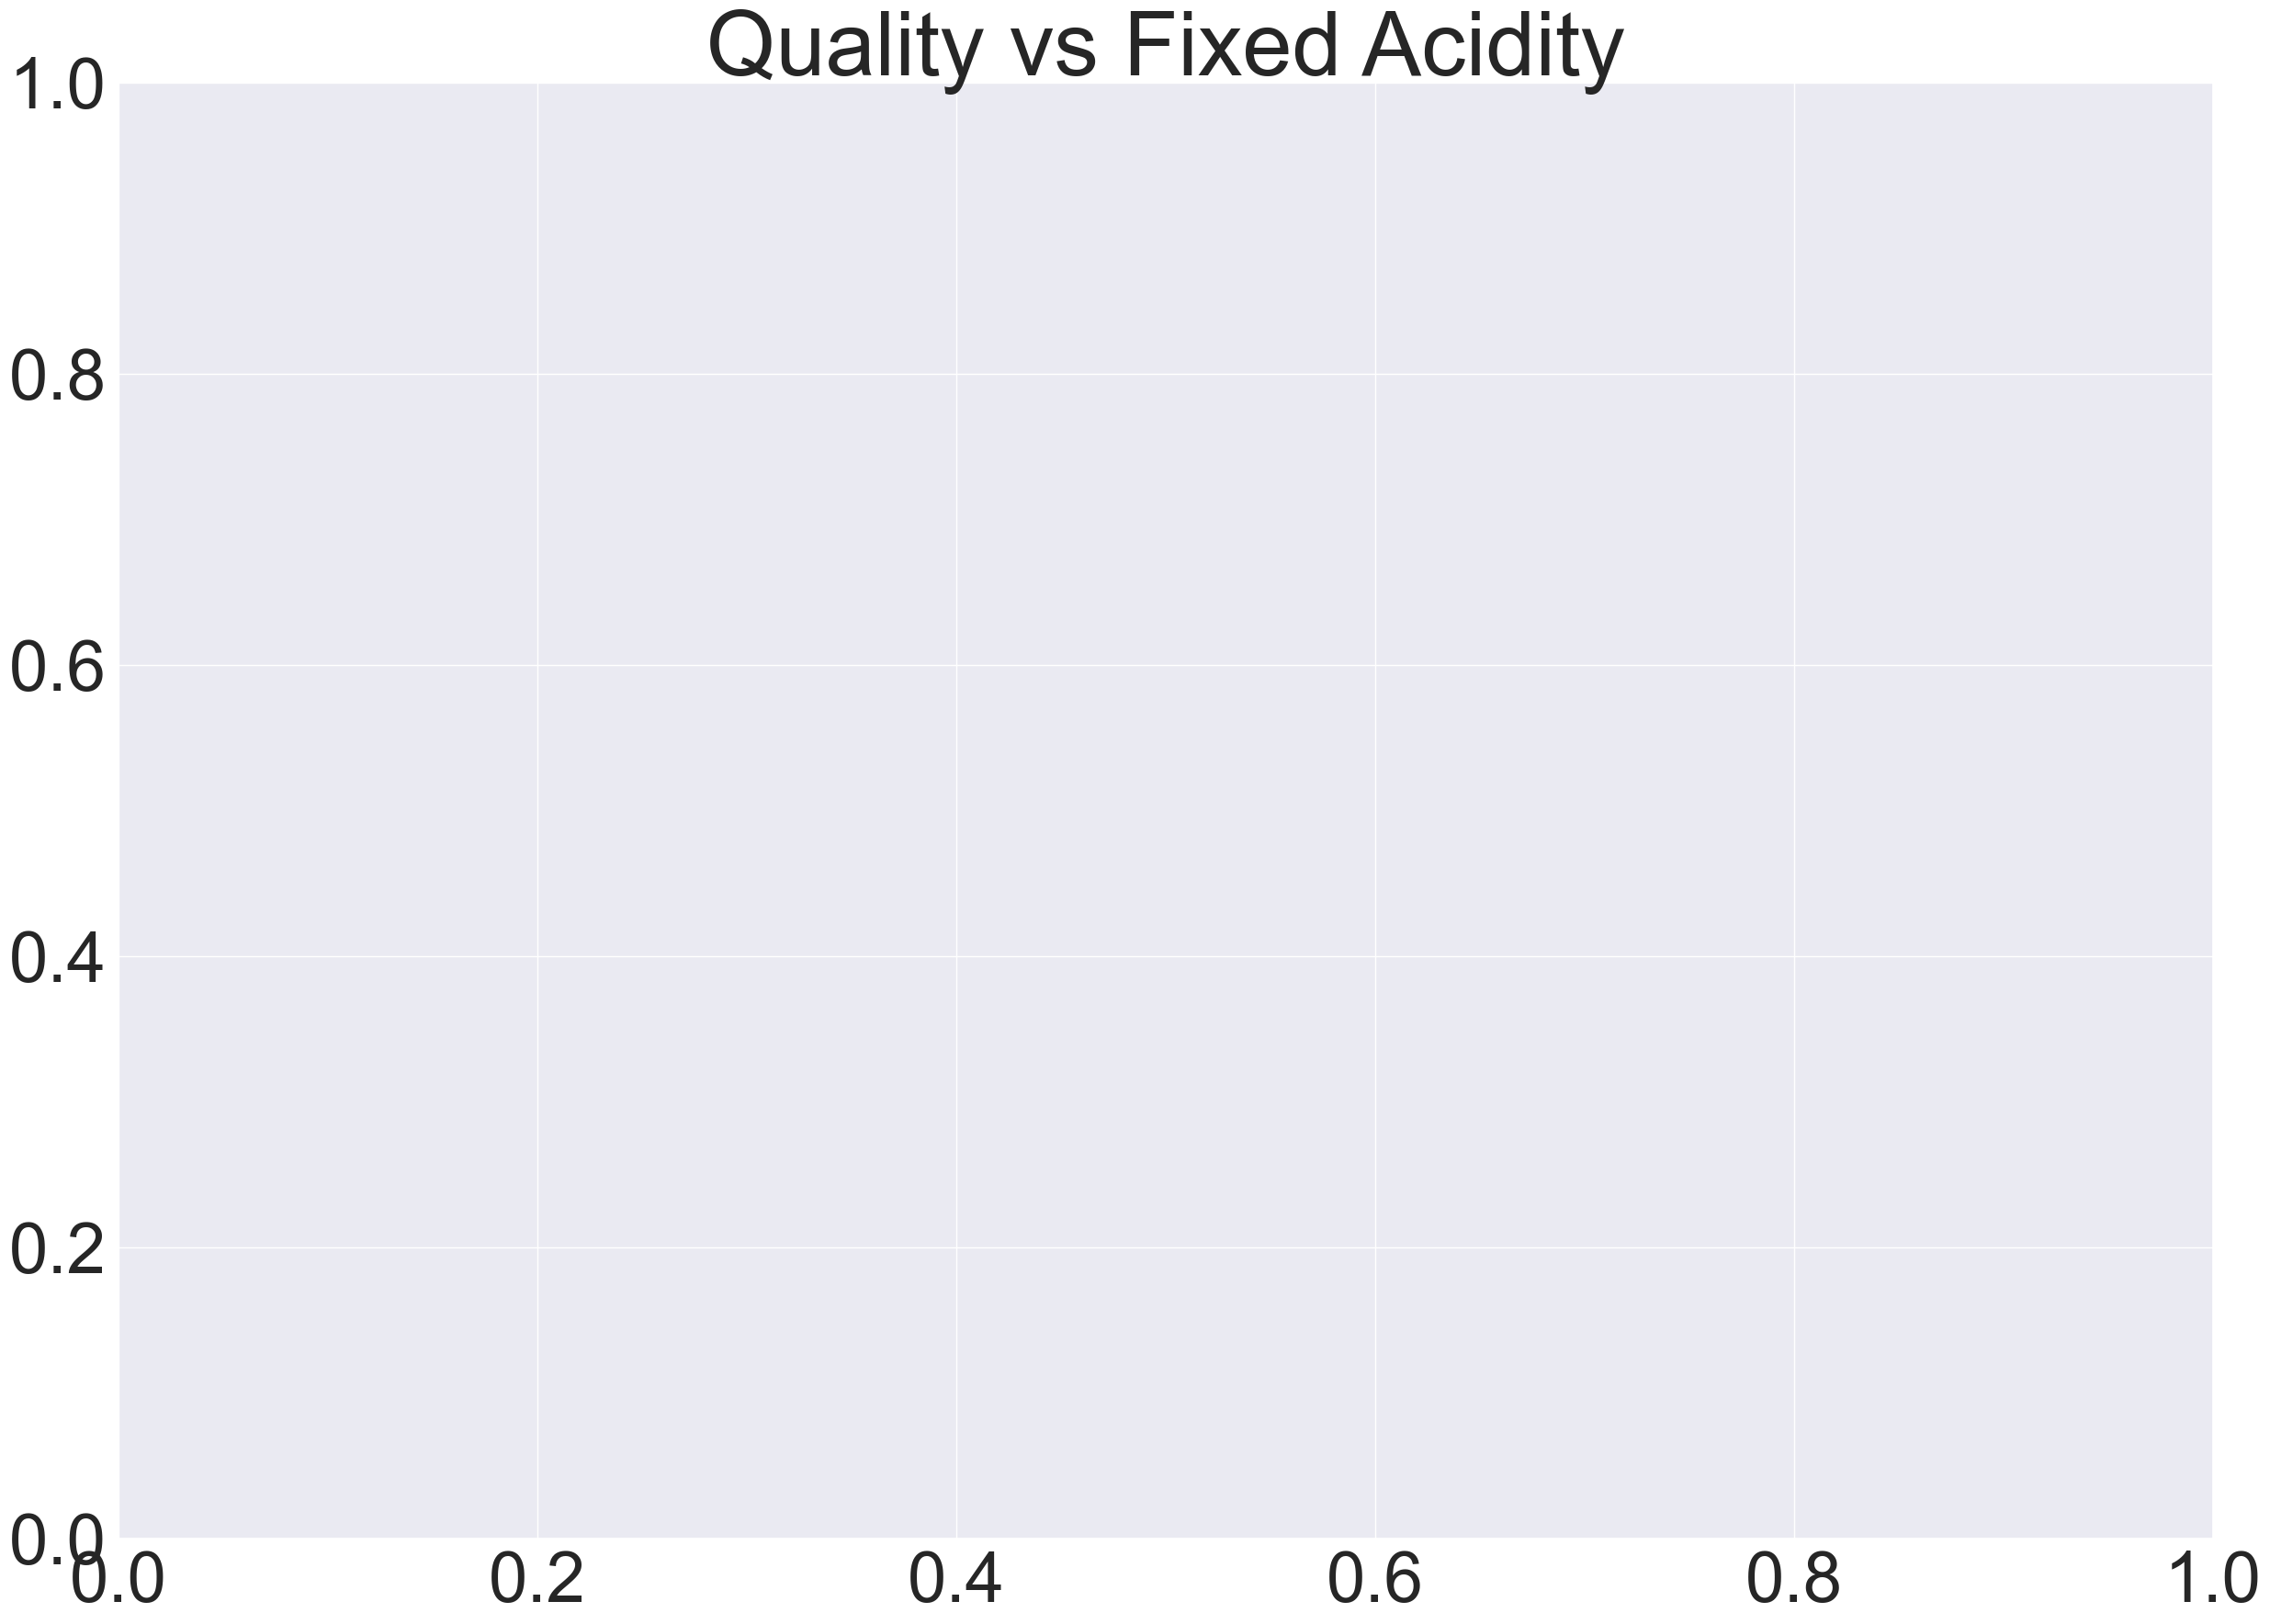

In [106]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs total SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=70)
sns.barplot(x = 'quality', y = 'alcohol', data = df)

In [107]:
bins = (2, 6.5, 8)
classes = ['bad','good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = classes)

KeyError: 'quality'

In [108]:
label_quality = LabelEncoder()

In [109]:
df['quality'] = label_quality.fit_transform(df['quality'])

KeyError: 'quality'

In [110]:
df['quality'].value_counts()

KeyError: 'quality'

KeyError: 'quality'

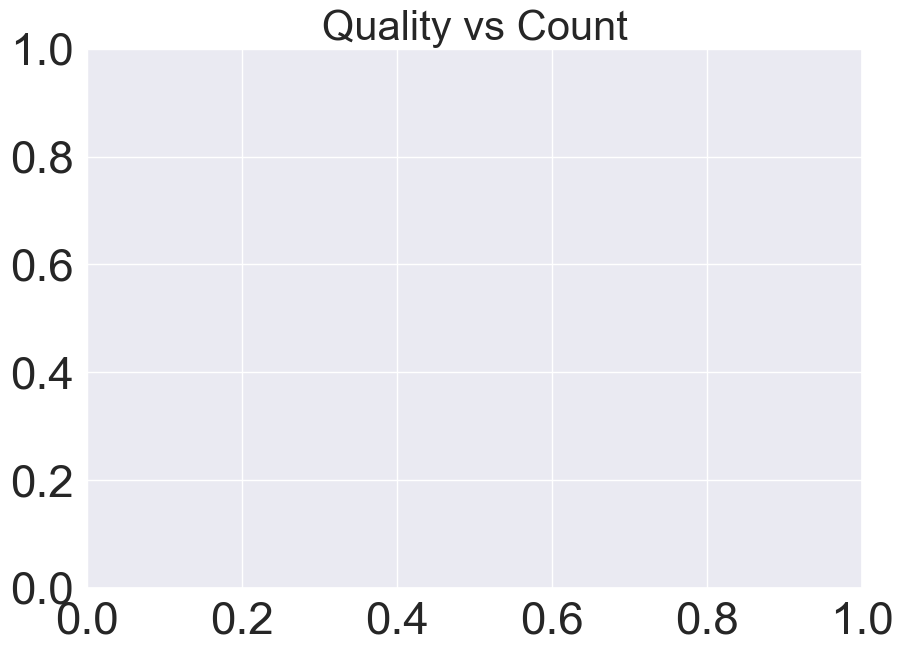

In [111]:
plt.figure(figsize=(10,7))
sns.set(font_scale=3)
plt.title("Quality vs Count",fontsize=30)
sns.countplot(df['quality'])

In [112]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [124]:
df['quality'] = df.index

In [127]:
%matplotlib inline
import seaborn as sns
sns.factorplot(x='quality', y='Value', data=df)

ValueError: Could not interpret input 'Value'

In [128]:
X = df.drop('quality', axis = 1)
Y = df['quality']

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)

In [130]:
sc = StandardScaler()

In [131]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

ValueError: could not convert string to float: '8.3;0.65;0.1;2.9;0.089;17;40;0.99803;3.29;0.55;9.5;5'

In [132]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, Y_train)
pred_RF = RF.predict(X_test)

ValueError: could not convert string to float: '8.3;0.65;0.1;2.9;0.089;17;40;0.99803;3.29;0.55;9.5;5'

In [133]:
pred1 = accuracy_score(Y_test,pred_RF)
print(pred1*100)

NameError: name 'pred_RF' is not defined

In [134]:
cm1=confusion_matrix(Y_test, pred_RF)
ax1 = sns.heatmap(cm1,annot=True)
ax1.set(xlabel='predict', ylabel='true')
plt.show()

NameError: name 'pred_RF' is not defined